# Análise da Vacinação no Recife

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('vacinados - 19 de maio.csv', sep= ';', encoding = 'utf-8')

In [3]:
raw_data.head()

,cpf,nome,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
0,***.457.304-**,JOSÉ BARBOSA DINIZ,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210114,2,03/04/2021,DRIVE THRU - BIG BOMPREÇO - BOA VIAGEM
1,***.457.304-**,JOSÉ BARBOSA DINIZ,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210052A,1,13/03/2021,DRIVE THRU GERALDÃO
2,***.556.154-**,LUIZ CAMILO DE SANTANA,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210093,2,01/04/2021,DRIVE THRU PARQUE DA MACAXEIRA
3,***.556.154-**,LUIZ CAMILO DE SANTANA,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,1,04/03/2021,DRIVE THRU PARQUE DA MACAXEIRA
4,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,2,04/03/2021,CENTRO DE VACINAÇÃO PARQUE DE EXPOSIÇÃO


# Tratamento de Dados

### Filtrando as colunas que serão usadas:

In [4]:
raw_data.columns

Index(['cpf', 'nome', 'grupo', 'vacina', 'lote', 'dose', 'data_vacinacao',
       'local_vacinacao'],
      dtype='object')

In [5]:
data = raw_data.loc[:, ['cpf', 'grupo', 'vacina', 'dose', 'data_vacinacao']]
data.head(5)

,cpf,grupo,vacina,dose,data_vacinacao
0,***.457.304-**,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),2,03/04/2021
1,***.457.304-**,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),1,13/03/2021
2,***.556.154-**,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),2,01/04/2021
3,***.556.154-**,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),1,04/03/2021
4,***.886.964-**,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),2,04/03/2021


### Renomeando as vacinas para tornar mais fácil o uso:

In [6]:
data['vacina'].unique()

array(['1 - CORONAVAC - SINOVAC (BUTANTAN)',
       '2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)',
       '3 - COMIRNATY (PFIZER)', '1- CORONAVAC - SINOVAC (BUTANTAN)'],
      dtype=object)

In [7]:
data['vacina'] = data['vacina'].replace(['1 - CORONAVAC - SINOVAC (BUTANTAN)',
                                         '1- CORONAVAC - SINOVAC (BUTANTAN)'],
                                        
                                        'CORONAVAC')

In [8]:
data['vacina'] = data['vacina'].replace(['2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)',
                                         ' CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)'],
                                        
                                        'CHADOX1NCOV-19')

In [9]:
data['vacina'] = data['vacina'].replace(['3 - COMIRNATY (PFIZER)'], 'COMIRNATY')

In [10]:
data['vacina'].unique()

array(['CORONAVAC', 'CHADOX1NCOV-19', 'COMIRNATY'], dtype=object)

### Renomeando os grupos para tornar mais fácil o uso:

In [11]:
data['grupo'].unique()

array(['TRABALHADORES DA SAÚDE', 'IDOSOS', 'OUTRAS PRIORIDADES',
       'PESSOAS COM COMORBIDADES', 'TRABALHADORES DA EDUCAÇÃO',
       'GESTANTES E PUÉRPERAS',
       'GESTANTES E PUÉRPERAS NÃO RESIDENTES EM RECIFE'], dtype=object)

In [12]:
data['grupo'] = data['grupo'].replace(['PESSOAS COM COMORBIDADES'], 'COMORBIDADES')

In [13]:
data['grupo'] = data['grupo'].replace(['TRABALHADORES DA SAÃDE'], 'SAÚDE')

In [14]:
data['grupo'] = data['grupo'].replace(['OUTRAS PRIORIDADES'], 'OUTROS')

In [15]:
data['grupo'] = data['grupo'].replace(['TRABALHADORES DA EDUCAÃ\x87Ã\x83O'], 'EDUCAÇÃO')

In [16]:
data['grupo'] = data['grupo'].replace(['GRÃ\x81VIDAS E PUÃ\x89RPERAS',
                                       'GESTANTES E PUÃ\x89RPERAS NÃ\x83O RESIDENTES EM RECIFE',
                                       'GESTANTES E PUÃ\x89RPERAS'],
                                      
                                      'GRÁVIDAS E PUÉRPERAS')

In [17]:
data['grupo'].unique()

array(['TRABALHADORES DA SAÚDE', 'IDOSOS', 'OUTROS', 'COMORBIDADES',
       'TRABALHADORES DA EDUCAÇÃO', 'GESTANTES E PUÉRPERAS',
       'GESTANTES E PUÉRPERAS NÃO RESIDENTES EM RECIFE'], dtype=object)

In [18]:
data.head()

,cpf,grupo,vacina,dose,data_vacinacao
0,***.457.304-**,TRABALHADORES DA SAÚDE,CORONAVAC,2,03/04/2021
1,***.457.304-**,TRABALHADORES DA SAÚDE,CORONAVAC,1,13/03/2021
2,***.556.154-**,IDOSOS,CORONAVAC,2,01/04/2021
3,***.556.154-**,IDOSOS,CORONAVAC,1,04/03/2021
4,***.886.964-**,TRABALHADORES DA SAÚDE,CORONAVAC,2,04/03/2021


# Estatística Descritiva da Vacinação

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histograma com a proporção das doses aplicadas:

In [20]:
doses_proportion = data['dose'].value_counts(normalize= True).reset_index()
doses_proportion.columns = ['dose', 'proporção']
doses_proportion

,dose,proporção
0,1,0.648749
1,2,0.351251


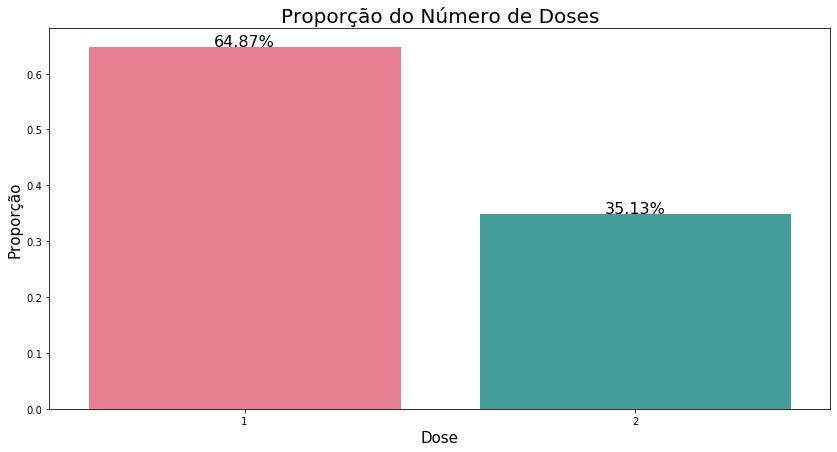

In [21]:
# figure config
fig, ax = plt.subplots(figsize= (14, 7))
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('husl', 2))

sns.barplot(x= 'dose', y= 'proporção', data= doses_proportion, ax= ax)

plt.title('Proporção do Número de Doses', fontsize= 20)
plt.xlabel('Dose', fontsize= 15)
plt.ylabel('Proporção', fontsize= 15)

# percentages at the top of histograms
for index, row in doses_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.2%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

plt.show()

### Possível interpretação: infere-se que a quantidade das primeiras doses é maior devido à diminuição da taxa de vacinação no mês de maio por falta de vacinas.

In [22]:
doses_frequency = data["dose"].value_counts().reset_index()
doses_frequency.columns = ["dose", "frequência"]
doses_frequency.head()

,dose,frequência
0,1,387320
1,2,209706


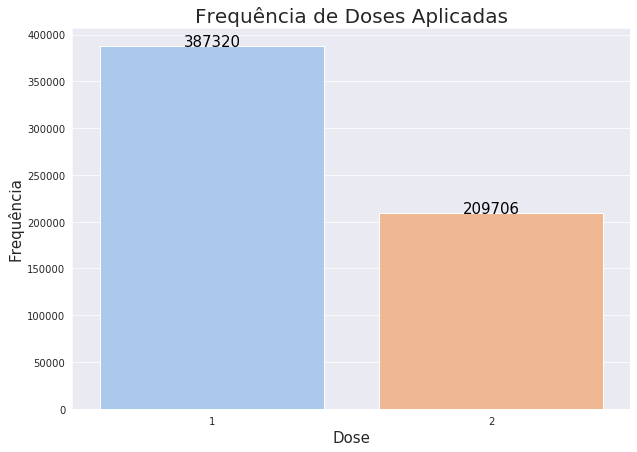

In [23]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("pastel", 2))

sns.barplot(x = "dose", y = "frequência", data = doses_frequency, ax = axis)

plt.title("Frequência de Doses Aplicadas", fontsize = 20)
plt.xlabel("Dose", fontsize = 15)
plt.ylabel("Frequência", fontsize = 15)

for index, row in doses_frequency.iterrows():
    axis.text(index, row["frequência"], "{}".format(row["frequência"]), color = "black", ha = "center", fontsize = 15)

plt.show()

### Valores absolutos das doses aplicadas até hoje (19/05/2021).

### Histograma com a proporção das vacinas usadas:

In [24]:
vaccines_proportion = data['vacina'].value_counts(normalize= True).reset_index()
vaccines_proportion.columns = ['vacina', 'proporção']
vaccines_proportion

,vacina,proporção
0,CORONAVAC,0.678302
1,CHADOX1NCOV-19,0.297511
2,COMIRNATY,0.024187


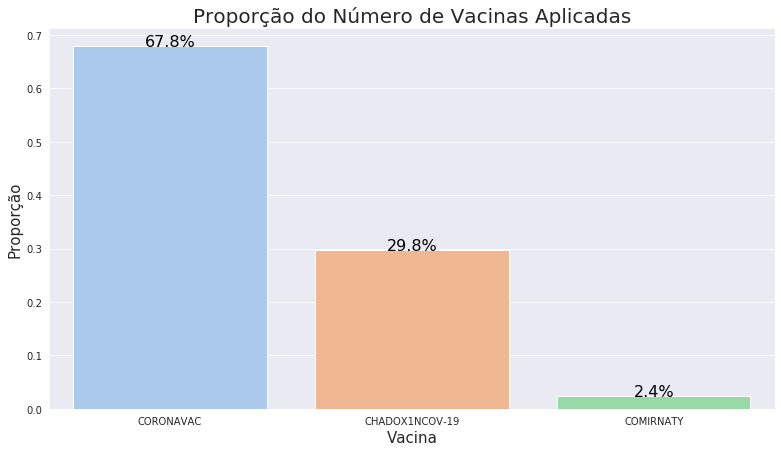

In [25]:
fig, ax = plt.subplots(figsize=(13, 7)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('pastel', 3))

sns.barplot(x= 'vacina', y= 'proporção', data= vaccines_proportion, ax= ax)

plt.title('Proporção do Número de Vacinas Aplicadas', fontsize= 20)
plt.xlabel('Vacina', fontsize= 15)
plt.ylabel('Proporção', fontsize= 15)

for index, row in vaccines_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.1%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

plt.show()

In [26]:
data["vacina"].value_counts()["CORONAVAC"]

404964

## Possível interpretação: a alta adesão à vacina brasileira reforça o poder da pesquisa brasileira.

### Histograma com a proporção dos grupos vacinados:

In [27]:
groups_proportion = data['grupo'].value_counts(normalize= True).reset_index()
groups_proportion.columns = ['grupo', 'proporção']

# groups absolutes are not equally spread, so lets check out the top 3
groups_proportion = groups_proportion.nlargest(3, 'proporção')

groups_proportion

,grupo,proporção
0,IDOSOS,0.696387
1,TRABALHADORES DA SAÚDE,0.243095
2,COMORBIDADES,0.025862


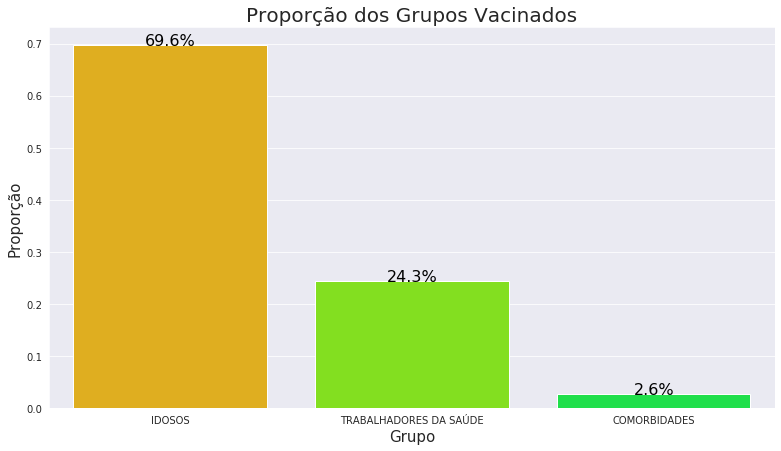

In [28]:
fig, ax = plt.subplots(figsize=(13, 7)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('hsv', 7))

sns.barplot(x= 'grupo', y= 'proporção', data= groups_proportion, ax= ax)

plt.title('Proporção dos Grupos Vacinados', fontsize= 20)
plt.xlabel('Grupo', fontsize= 15)
plt.ylabel('Proporção', fontsize= 15)

for index, row in groups_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.1%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

plt.show()

## Possível interpretação: minha conclusão é que os idosos são o grupo prioritário, mas note que o grupo dos profissionais de saúde vem em seguida e isso se deve à alta taxa de mortalidade também neste grupo.

# *Análise por Agrupamento*

### Vacina mais usada em cada grupo:

In [29]:
data.groupby('grupo').apply(lambda df: df['vacina'].value_counts().idxmax())

grupo
COMORBIDADES                                      CHADOX1NCOV-19
GESTANTES E PUÉRPERAS                                  COMIRNATY
GESTANTES E PUÉRPERAS NÃO RESIDENTES EM RECIFE         COMIRNATY
IDOSOS                                                 CORONAVAC
OUTROS                                                 CORONAVAC
TRABALHADORES DA EDUCAÇÃO                         CHADOX1NCOV-19
TRABALHADORES DA SAÚDE                                 CORONAVAC
dtype: object

### Média de doses tomadas em cada grupo:

In [30]:
data.groupby('grupo').apply(lambda df: df['dose'].mean())

grupo
COMORBIDADES                                      1.000000
GESTANTES E PUÉRPERAS                             1.000000
GESTANTES E PUÉRPERAS NÃO RESIDENTES EM RECIFE    1.000000
IDOSOS                                            1.366598
OUTROS                                            1.202782
TRABALHADORES DA EDUCAÇÃO                         1.000000
TRABALHADORES DA SAÚDE                            1.391617
dtype: float64

### Quantidade de cada tipo de vacina aplicada em cada grupo:

In [31]:
data.groupby(['grupo', 'vacina']).size()

grupo                                           vacina        
COMORBIDADES                                    CHADOX1NCOV-19      8071
                                                COMIRNATY           7356
                                                CORONAVAC             13
GESTANTES E PUÉRPERAS                           CHADOX1NCOV-19         4
                                                COMIRNATY           5462
                                                CORONAVAC              1
GESTANTES E PUÉRPERAS NÃO RESIDENTES EM RECIFE  COMIRNATY             93
IDOSOS                                          CHADOX1NCOV-19    127318
                                                COMIRNATY            175
                                                CORONAVAC         288268
OUTROS                                          CHADOX1NCOV-19       396
                                                COMIRNATY            899
                                                CORONAVAC    